**DATA Inferred**
> *The Data Set contains 8807 rows and 12 columns*<br>
> *Columns names are already standardized.*<br>
> *All columns have the appropriate data types except the date, convert it to the format of YYYY-MM-DD <br>*
> *The data set contains  NaN at various cells that needs to be handled.<br>*

```python
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0

```
> director cast and country  are important for eda so instead of droppign them it would be appropriate to fill them with text like 'unknown'.<br>
> rating na`s are filled with the mode of the rating column i.e TV-MA and duration na are filled with 'unknown'.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv(r"D:\Data Science\venv\Netflix\data\netflix_titles.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# change the date to yyyy-mm-dd

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [5]:
# Check missing values before cleaning
df.isna().sum()

# Fill missing categorical values (CORRECT WAY)
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Standardize 'unknown' → 'Unknown' (case-insensitive)
df.replace(r'(?i)^unknown$', 'Unknown', regex=True, inplace=True)

# Convert date column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Verify after cleaning
df.isna().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [6]:
df[df['date_added'].isna()]

df['date_added'] = df['date_added'].fillna('unknown')
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [7]:
df.isna().sum()

#  now to fill rating and duration we can simply fill them by mode as there are only few na rating = 4na and duration = 3na

df[df['rating'].isna()]
# most_occuring = df['rating'].mode()
# df['rating'] = df['rating'].fillna('TV-MA')

df['duration'] = df['duration'].fillna('unknown')
df.isna().sum()

# All missing values are handled now 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

### Data Cleaning Summary
- Handled missing values in categorical columns using standardized placeholders
- Converted date columns to datetime format
- Preserved raw data by using a staging layer for transformations


In [8]:
df_clean = df.copy(deep=True)

df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'],errors='coerce')
df_clean['date_added']
df_clean[df_clean['date_added'].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6177,s6178,TV Show,忍者ハットリくん,Unknown,Unknown,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."
6213,s6214,TV Show,Bad Education,Unknown,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,Unknown,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...
8557,s8558,TV Show,The West Wing,Unknown,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...
8684,s8685,TV Show,Vroomiz,Unknown,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
8712,s8713,TV Show,Weird Wonders of the World,Unknown,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...


In [33]:
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['year_added'] = df_clean['year_added'].astype('Int64')


In [34]:
yearly_content = (
    df_clean
    .dropna(subset=['year_added'])
    .groupby('year_added')
    .size()
)
yearly_content.head()


year_added
2008     2
2009     2
2010     1
2011    13
2012     3
dtype: int64

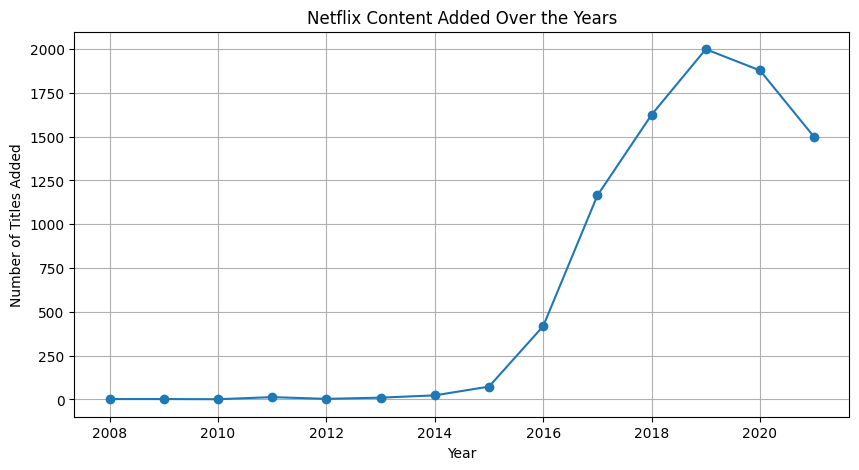

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(yearly_content.index, yearly_content.values, marker='o')

plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()


In [39]:
df_clean.to_csv("netflix_cleaned.csv", index=False)
